## Understanding Sequential Vs Functional API in Keras

https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/

Keras offers two ways to build neural networks. They are as follows:

1.using Sequential API

Here we create the model layer-by-layer. It is very simple and easy to use. But sharing of layers or branching of layers is not allowed (We will see what sharing or branching means later). Also, you can’t have multiple inputs or outputs.

2.using Functional API

It is more flexible than the sequential API. It is more powerful than the sequential API in the sense branching or sharing of layers is allowed here. And also it can have multiple inputs and outputs.

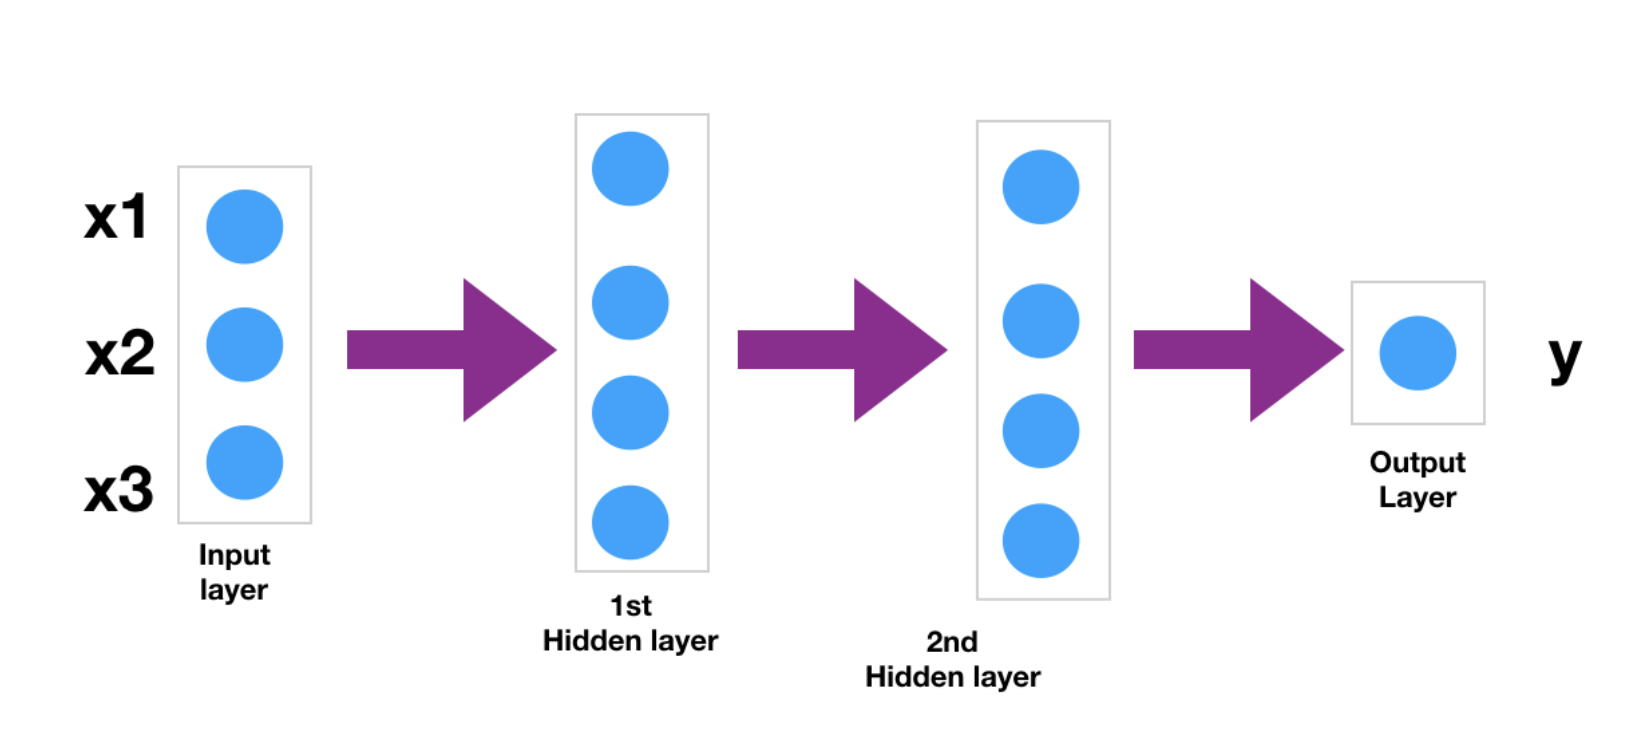

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Data

Predicting Energy output and exhaust vacuum for a Power Plant
We are going to use the combined cycle power plant data set from the UCI machine learning repository. Download the dataset from the below link.
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [8]:
df = pd.read_excel('../../Datasets/CCPP/CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [9]:
## define function to get outputs
def get_outputs(data):
    y1 = data.pop('PE')
    y1 = np.array(y1)
    y2 = data.pop('V')
    y2 = np.array(y2)
    return y1, y2

In [10]:
# Split the data in train and test
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [11]:
##getting the outputs(PE) and (V) of the train and test data 
y_train = get_outputs(train)
y_test = get_outputs(test)

In [14]:
# Scale the input
min_max_scaler = MinMaxScaler()

In [15]:
X_train = min_max_scaler.fit_transform(train)
X_test = min_max_scaler.transform(test)

In [50]:
y_train

(array([484.32, 449.04, 471.86, ..., 462.56, 450.37, 452.94]),
 array([38.91, 65.61, 39.61, ..., 39.54, 45.01, 49.69]))

### Sequential API

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [24]:
# Create the model
sequential_model = Sequential()

In [25]:
sequential_model.add(Dense(4, activation='relu')) ##<----- You don't have to specify input size.Just define the hidden layers
sequential_model.add(Dense(4, activation='relu'))
sequential_model.add(Dense(1, activation='linear'))

In [26]:
sequential_model.compile(optimizer='adam', loss='mse')

In [27]:
sequential_model.fit(X_train, y_train, batch_size=128, epochs=400)

Epoch 1/400
60/60 [==============================] - 0s 758us/step - loss: 206677.3281
Epoch 2/400
60/60 [==============================] - 0s 674us/step - loss: 206499.3750
Epoch 3/400
60/60 [==============================] - 0s 660us/step - loss: 206185.4688
Epoch 4/400
60/60 [==============================] - 0s 660us/step - loss: 205632.5781
Epoch 5/400
60/60 [==============================] - 0s 698us/step - loss: 204808.0469
Epoch 6/400
60/60 [==============================] - 0s 655us/step - loss: 203424.2656
Epoch 7/400
60/60 [==============================] - 0s 688us/step - loss: 201199.4062
Epoch 8/400
60/60 [==============================] - 0s 663us/step - loss: 198214.7500
Epoch 9/400
60/60 [==============================] - 0s 674us/step - loss: 194461.7188
Epoch 10/400
60/60 [==============================] - 0s 658us/step - loss: 189911.9531
Epoch 11/400
60/60 [==============================] - 0s 695us/step - loss: 184550.9531
Epoch 12/400
60/60 [=====================

60/60 [==============================] - 0s 647us/step - loss: 1308.2028
Epoch 97/400
60/60 [==============================] - 0s 661us/step - loss: 1297.8438
Epoch 98/400
60/60 [==============================] - 0s 745us/step - loss: 1287.0999
Epoch 99/400
60/60 [==============================] - 0s 664us/step - loss: 1276.7023
Epoch 100/400
60/60 [==============================] - 0s 688us/step - loss: 1266.3881
Epoch 101/400
60/60 [==============================] - 0s 662us/step - loss: 1256.1111
Epoch 102/400
60/60 [==============================] - 0s 642us/step - loss: 1245.5219
Epoch 103/400
60/60 [==============================] - 0s 659us/step - loss: 1235.0696
Epoch 104/400
60/60 [==============================] - 0s 664us/step - loss: 1224.9658
Epoch 105/400
60/60 [==============================] - 0s 669us/step - loss: 1214.5449
Epoch 106/400
60/60 [==============================] - 0s 642us/step - loss: 1204.4445
Epoch 107/400
60/60 [==============================] - 0s 65

60/60 [==============================] - 0s 672us/step - loss: 377.7692
Epoch 192/400
60/60 [==============================] - 0s 665us/step - loss: 369.1800
Epoch 193/400
60/60 [==============================] - 0s 663us/step - loss: 359.5777
Epoch 194/400
60/60 [==============================] - 0s 670us/step - loss: 351.2117
Epoch 195/400
60/60 [==============================] - 0s 666us/step - loss: 342.5761
Epoch 196/400
60/60 [==============================] - 0s 676us/step - loss: 333.6719
Epoch 197/400
60/60 [==============================] - 0s 664us/step - loss: 325.2848
Epoch 198/400
60/60 [==============================] - 0s 675us/step - loss: 316.6259
Epoch 199/400
60/60 [==============================] - 0s 669us/step - loss: 308.4674
Epoch 200/400
60/60 [==============================] - 0s 677us/step - loss: 300.3723
Epoch 201/400
60/60 [==============================] - 0s 671us/step - loss: 292.0586
Epoch 202/400
60/60 [==============================] - 0s 675us/step

60/60 [==============================] - 0s 655us/step - loss: 23.0584
Epoch 288/400
60/60 [==============================] - 0s 678us/step - loss: 23.0791
Epoch 289/400
60/60 [==============================] - 0s 682us/step - loss: 23.1026
Epoch 290/400
60/60 [==============================] - 0s 689us/step - loss: 23.1838
Epoch 291/400
60/60 [==============================] - 0s 672us/step - loss: 23.1203
Epoch 292/400
60/60 [==============================] - 0s 681us/step - loss: 23.1154
Epoch 293/400
60/60 [==============================] - 0s 655us/step - loss: 23.1536
Epoch 294/400
60/60 [==============================] - 0s 667us/step - loss: 23.0370
Epoch 295/400
60/60 [==============================] - 0s 659us/step - loss: 23.1355
Epoch 296/400
60/60 [==============================] - 0s 668us/step - loss: 23.0654
Epoch 297/400
60/60 [==============================] - 0s 666us/step - loss: 23.1871
Epoch 298/400
60/60 [==============================] - 0s 669us/step - loss: 23

60/60 [==============================] - 0s 728us/step - loss: 22.8410
Epoch 384/400
60/60 [==============================] - 0s 670us/step - loss: 22.7865
Epoch 385/400
60/60 [==============================] - 0s 659us/step - loss: 22.8839
Epoch 386/400
60/60 [==============================] - 0s 665us/step - loss: 22.7985
Epoch 387/400
60/60 [==============================] - 0s 663us/step - loss: 22.9209
Epoch 388/400
60/60 [==============================] - 0s 674us/step - loss: 22.9686
Epoch 389/400
60/60 [==============================] - 0s 671us/step - loss: 22.8316
Epoch 390/400
60/60 [==============================] - 0s 674us/step - loss: 22.8045
Epoch 391/400
60/60 [==============================] - 0s 670us/step - loss: 22.7976
Epoch 392/400
60/60 [==============================] - 0s 680us/step - loss: 22.9029
Epoch 393/400
60/60 [==============================] - 0s 668us/step - loss: 22.8486
Epoch 394/400
60/60 [==============================] - 0s 681us/step - loss: 22

In [29]:
sequential_model.evaluate(X_test, y_test)

60/60 [==============================] - 0s 608us/step - loss: 21.9051


21.905054092407227

### Functional model

In [31]:
from keras.models import Model
from keras.layers import Input, Dense

In [32]:
# build the model
input_layer = Input(shape=(3,))
hidden_layer1 = Dense(4, activation='relu',)(input_layer)
hidden_layer2 = Dense(4, activation='relu',)(hidden_layer1)
output_layer = Dense(1, activation='linear')(hidden_layer2)

In [33]:
function_model = Model(inputs=input_layer, outputs=output_layer)

In [34]:
function_model.compile(optimizer='adam', loss='mse')

In [35]:
function_model.fit(X_train, y_train, batch_size=128, epochs=400)

Epoch 1/400
60/60 [==============================] - 0s 746us/step - loss: 206878.2656
Epoch 2/400
60/60 [==============================] - 0s 678us/step - loss: 206679.1719
Epoch 3/400
60/60 [==============================] - 0s 662us/step - loss: 206536.0156
Epoch 4/400
60/60 [==============================] - 0s 692us/step - loss: 206405.9688
Epoch 5/400
60/60 [==============================] - 0s 647us/step - loss: 206266.2969
Epoch 6/400
60/60 [==============================] - 0s 679us/step - loss: 206075.1719
Epoch 7/400
60/60 [==============================] - 0s 670us/step - loss: 205437.7969
Epoch 8/400
60/60 [==============================] - 0s 686us/step - loss: 204139.5781
Epoch 9/400
60/60 [==============================] - 0s 661us/step - loss: 202309.6719
Epoch 10/400
60/60 [==============================] - 0s 684us/step - loss: 199826.2500
Epoch 11/400
60/60 [==============================] - 0s 698us/step - loss: 196562.2969
Epoch 12/400
60/60 [=====================

60/60 [==============================] - 0s 662us/step - loss: 1327.4259
Epoch 96/400
60/60 [==============================] - 0s 669us/step - loss: 1322.7384
Epoch 97/400
60/60 [==============================] - 0s 659us/step - loss: 1317.8278
Epoch 98/400
60/60 [==============================] - 0s 681us/step - loss: 1313.1331
Epoch 99/400
60/60 [==============================] - 0s 677us/step - loss: 1308.2952
Epoch 100/400
60/60 [==============================] - 0s 677us/step - loss: 1302.8591
Epoch 101/400
60/60 [==============================] - 0s 719us/step - loss: 1297.5972
Epoch 102/400
60/60 [==============================] - 0s 709us/step - loss: 1292.1777
Epoch 103/400
60/60 [==============================] - 0s 690us/step - loss: 1286.7371
Epoch 104/400
60/60 [==============================] - 0s 705us/step - loss: 1280.9838
Epoch 105/400
60/60 [==============================] - 0s 696us/step - loss: 1275.5226
Epoch 106/400
60/60 [==============================] - 0s 677

Epoch 190/400
60/60 [==============================] - 0s 687us/step - loss: 494.1026
Epoch 191/400
60/60 [==============================] - 0s 678us/step - loss: 484.1970
Epoch 192/400
60/60 [==============================] - 0s 659us/step - loss: 474.8871
Epoch 193/400
60/60 [==============================] - 0s 676us/step - loss: 465.4165
Epoch 194/400
60/60 [==============================] - 0s 678us/step - loss: 455.1295
Epoch 195/400
60/60 [==============================] - 0s 661us/step - loss: 445.5442
Epoch 196/400
60/60 [==============================] - 0s 660us/step - loss: 436.0966
Epoch 197/400
60/60 [==============================] - 0s 652us/step - loss: 426.6595
Epoch 198/400
60/60 [==============================] - 0s 665us/step - loss: 417.4402
Epoch 199/400
60/60 [==============================] - 0s 678us/step - loss: 408.0798
Epoch 200/400
60/60 [==============================] - 0s 672us/step - loss: 398.6482
Epoch 201/400
60/60 [==============================] -

60/60 [==============================] - 0s 652us/step - loss: 23.8303
Epoch 286/400
60/60 [==============================] - 0s 693us/step - loss: 23.7374
Epoch 287/400
60/60 [==============================] - 0s 648us/step - loss: 23.6531
Epoch 288/400
60/60 [==============================] - 0s 643us/step - loss: 23.5614
Epoch 289/400
60/60 [==============================] - 0s 658us/step - loss: 23.5308
Epoch 290/400
60/60 [==============================] - 0s 642us/step - loss: 23.4818
Epoch 291/400
60/60 [==============================] - 0s 686us/step - loss: 23.4613
Epoch 292/400
60/60 [==============================] - 0s 685us/step - loss: 23.4590
Epoch 293/400
60/60 [==============================] - 0s 673us/step - loss: 23.4407
Epoch 294/400
60/60 [==============================] - 0s 678us/step - loss: 23.3665
Epoch 295/400
60/60 [==============================] - 0s 687us/step - loss: 23.3420
Epoch 296/400
60/60 [==============================] - 0s 668us/step - loss: 23

60/60 [==============================] - 0s 652us/step - loss: 23.3304
Epoch 382/400
60/60 [==============================] - 0s 661us/step - loss: 23.2709
Epoch 383/400
60/60 [==============================] - 0s 656us/step - loss: 23.3357
Epoch 384/400
60/60 [==============================] - 0s 668us/step - loss: 23.2768
Epoch 385/400
60/60 [==============================] - 0s 651us/step - loss: 23.2861
Epoch 386/400
60/60 [==============================] - 0s 653us/step - loss: 23.3143
Epoch 387/400
60/60 [==============================] - 0s 654us/step - loss: 23.2894
Epoch 388/400
60/60 [==============================] - 0s 649us/step - loss: 23.3009
Epoch 389/400
60/60 [==============================] - 0s 652us/step - loss: 23.3107
Epoch 390/400
60/60 [==============================] - 0s 651us/step - loss: 23.2894
Epoch 391/400
60/60 [==============================] - 0s 664us/step - loss: 23.3311
Epoch 392/400
60/60 [==============================] - 0s 659us/step - loss: 23

#### Functional model with 1 ouput considers only first ouput i.e. PE which is in y1, other one is ignored

In [36]:
function_model.evaluate(X_test, y_test)

60/60 [==============================] - 0s 578us/step - loss: 22.3862


22.38621711730957

## branching and multiple outputs using functional api

Because you can define any layer separately and independently the functional API enables us for branching and multiple inputs and outputs.
What it means is you can branch out and add one (or any number of) different layers from any layer.

The following image explains branching and multiple outputs.

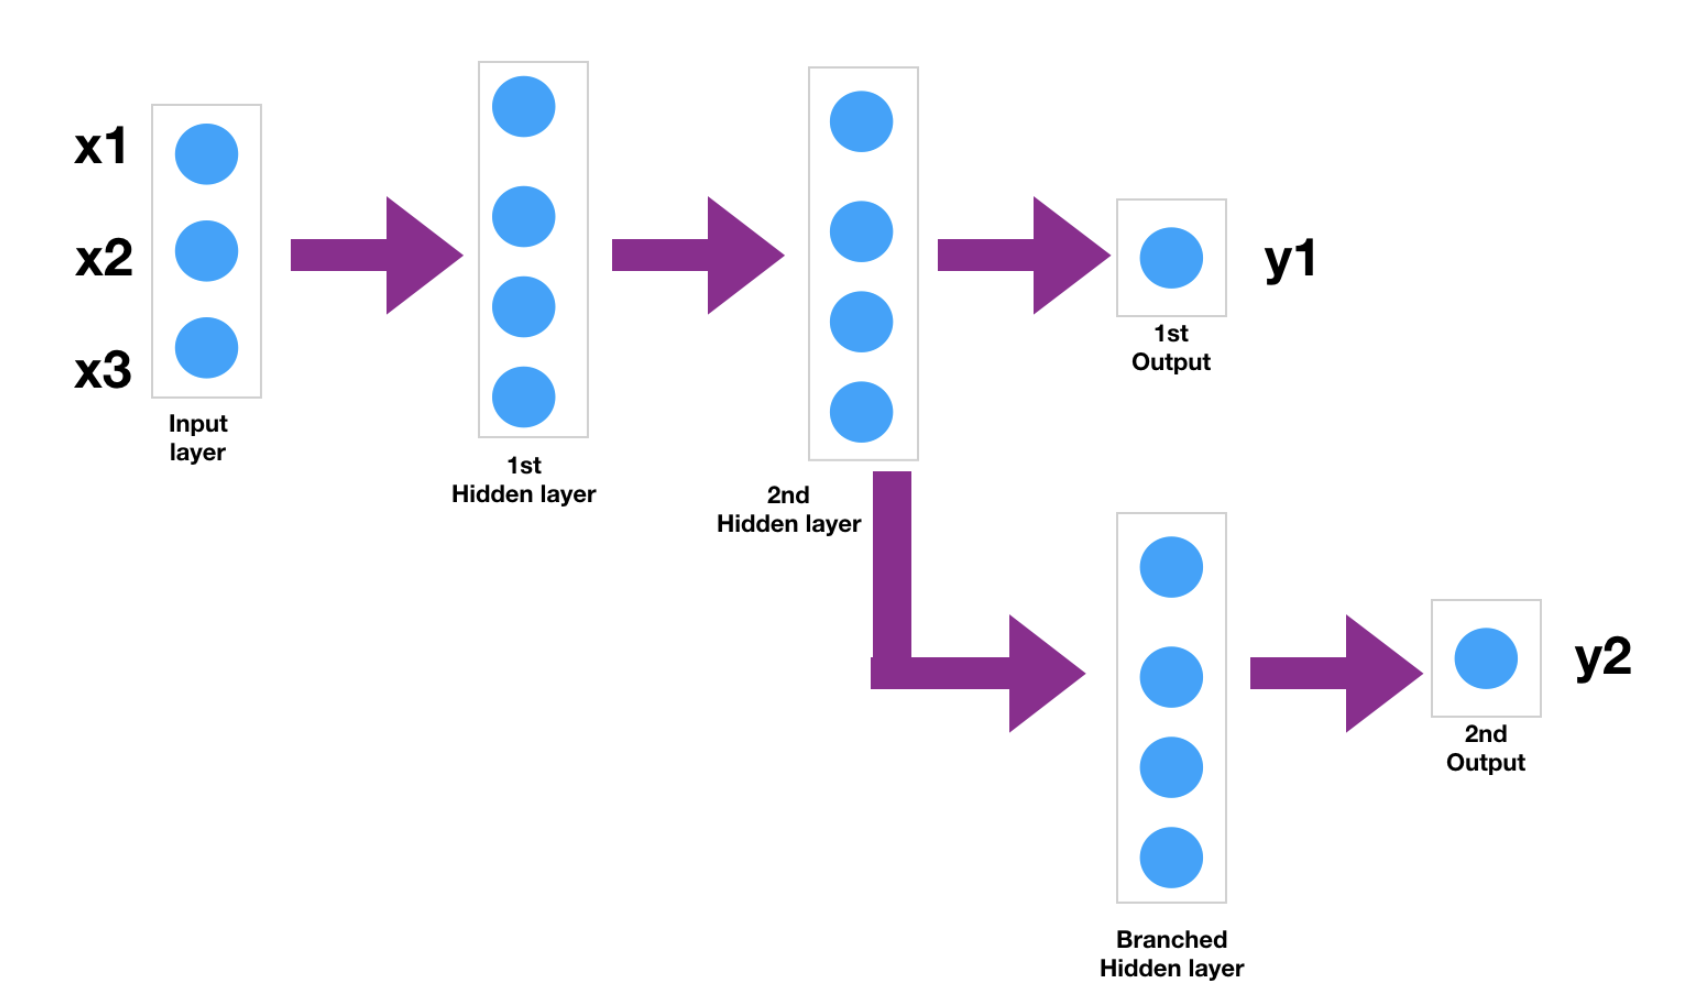


In [37]:
input_layer = Input(shape=(3,), name='input_layer')
hidden_layer1 = Dense(4, activation='relu', name='hidden_layer1')(input_layer)
hidden_layer2 = Dense(4, activation='relu', name='hidden_layer2')(hidden_layer1)

# output layer y1
y1_output = Dense(1, activation='linear', name='y1_output')(hidden_layer2)

# Defining the branching layer
branching_layer = Dense(4, activation='relu', name='branching_layer')(hidden_layer2)

# ouput layer y2
y2_output = Dense(1, activation='linear', name='y2_output')(branching_layer)

In [38]:
functiona_model2 = Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [39]:
function_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 16        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [40]:
functiona_model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 3)]          0           []                               
                                                                                                  
 hidden_layer1 (Dense)          (None, 4)            16          ['input_layer[0][0]']            
                                                                                                  
 hidden_layer2 (Dense)          (None, 4)            20          ['hidden_layer1[0][0]']          
                                                                                                  
 branching_layer (Dense)        (None, 4)            20          ['hidden_layer2[0][0]']          
                                                                                            

In [41]:
functiona_model2.compile(optimizer='adam', loss={'y1_output':'mse', 'y2_output':'mse'})

In [42]:
functiona_model2.fit(X_train, y_train, epochs=400, batch_size=128)

Epoch 1/400
60/60 [==============================] - 0s 963us/step - loss: 209421.4844 - y1_output_loss: 206335.5469 - y2_output_loss: 3085.8865
Epoch 2/400
60/60 [==============================] - 0s 886us/step - loss: 208894.2656 - y1_output_loss: 205854.2500 - y2_output_loss: 3039.9839
Epoch 3/400
60/60 [==============================] - 0s 840us/step - loss: 208050.5156 - y1_output_loss: 205099.7656 - y2_output_loss: 2950.7236
Epoch 4/400
60/60 [==============================] - 0s 1ms/step - loss: 206699.1406 - y1_output_loss: 203915.2031 - y2_output_loss: 2783.9336
Epoch 5/400
60/60 [==============================] - 0s 912us/step - loss: 204780.0312 - y1_output_loss: 202263.9531 - y2_output_loss: 2516.0881
Epoch 6/400
60/60 [==============================] - 0s 800us/step - loss: 202201.7188 - y1_output_loss: 200080.3750 - y2_output_loss: 2121.4097
Epoch 7/400
60/60 [==============================] - 0s 1ms/step - loss: 198898.2500 - y1_output_loss: 197296.8750 - y2_output_loss:

60/60 [==============================] - 0s 875us/step - loss: 1903.6001 - y1_output_loss: 1772.5889 - y2_output_loss: 131.0110
Epoch 59/400
60/60 [==============================] - 0s 890us/step - loss: 1897.2910 - y1_output_loss: 1766.0917 - y2_output_loss: 131.1988
Epoch 60/400
60/60 [==============================] - 0s 873us/step - loss: 1891.0211 - y1_output_loss: 1759.4707 - y2_output_loss: 131.5509
Epoch 61/400
60/60 [==============================] - 0s 881us/step - loss: 1884.4629 - y1_output_loss: 1752.5649 - y2_output_loss: 131.8976
Epoch 62/400
60/60 [==============================] - 0s 867us/step - loss: 1877.8000 - y1_output_loss: 1745.6443 - y2_output_loss: 132.1557
Epoch 63/400
60/60 [==============================] - 0s 840us/step - loss: 1870.9568 - y1_output_loss: 1738.5443 - y2_output_loss: 132.4127
Epoch 64/400
60/60 [==============================] - 0s 848us/step - loss: 1864.1014 - y1_output_loss: 1731.4401 - y2_output_loss: 132.6607
Epoch 65/400
60/60 [======

60/60 [==============================] - 0s 850us/step - loss: 1401.6019 - y1_output_loss: 1243.0574 - y2_output_loss: 158.5448
Epoch 117/400
60/60 [==============================] - 0s 844us/step - loss: 1392.4358 - y1_output_loss: 1233.1213 - y2_output_loss: 159.3140
Epoch 118/400
60/60 [==============================] - 0s 835us/step - loss: 1382.0137 - y1_output_loss: 1222.4097 - y2_output_loss: 159.6039
Epoch 119/400
60/60 [==============================] - 0s 827us/step - loss: 1372.5021 - y1_output_loss: 1212.0601 - y2_output_loss: 160.4421
Epoch 120/400
60/60 [==============================] - 0s 832us/step - loss: 1362.4771 - y1_output_loss: 1201.6979 - y2_output_loss: 160.7791
Epoch 121/400
60/60 [==============================] - 0s 847us/step - loss: 1352.7825 - y1_output_loss: 1191.4738 - y2_output_loss: 161.3087
Epoch 122/400
60/60 [==============================] - 0s 845us/step - loss: 1342.8882 - y1_output_loss: 1180.9877 - y2_output_loss: 161.9003
Epoch 123/400
60/60 

60/60 [==============================] - 0s 869us/step - loss: 798.8497 - y1_output_loss: 619.6987 - y2_output_loss: 179.1511
Epoch 175/400
60/60 [==============================] - 0s 863us/step - loss: 788.0485 - y1_output_loss: 608.5406 - y2_output_loss: 179.5080
Epoch 176/400
60/60 [==============================] - 0s 841us/step - loss: 777.1714 - y1_output_loss: 597.4527 - y2_output_loss: 179.7187
Epoch 177/400
60/60 [==============================] - 0s 816us/step - loss: 766.4936 - y1_output_loss: 586.4225 - y2_output_loss: 180.0713
Epoch 178/400
60/60 [==============================] - 0s 875us/step - loss: 755.4446 - y1_output_loss: 575.3611 - y2_output_loss: 180.0835
Epoch 179/400
60/60 [==============================] - 0s 863us/step - loss: 744.8010 - y1_output_loss: 564.5314 - y2_output_loss: 180.2698
Epoch 180/400
60/60 [==============================] - 0s 831us/step - loss: 733.8117 - y1_output_loss: 553.3088 - y2_output_loss: 180.5031
Epoch 181/400
60/60 [=============

60/60 [==============================] - 0s 870us/step - loss: 289.7455 - y1_output_loss: 96.8495 - y2_output_loss: 192.8961
Epoch 233/400
60/60 [==============================] - 0s 875us/step - loss: 285.0099 - y1_output_loss: 92.0067 - y2_output_loss: 193.0033
Epoch 234/400
60/60 [==============================] - 0s 889us/step - loss: 280.5348 - y1_output_loss: 87.3790 - y2_output_loss: 193.1558
Epoch 235/400
60/60 [==============================] - 0s 848us/step - loss: 276.4939 - y1_output_loss: 82.9527 - y2_output_loss: 193.5412
Epoch 236/400
60/60 [==============================] - 0s 868us/step - loss: 272.3722 - y1_output_loss: 78.6803 - y2_output_loss: 193.6919
Epoch 237/400
60/60 [==============================] - 0s 869us/step - loss: 268.7307 - y1_output_loss: 74.6715 - y2_output_loss: 194.0592
Epoch 238/400
60/60 [==============================] - 0s 847us/step - loss: 264.9914 - y1_output_loss: 70.8437 - y2_output_loss: 194.1479
Epoch 239/400
60/60 [====================

60/60 [==============================] - 0s 909us/step - loss: 223.5103 - y1_output_loss: 25.0878 - y2_output_loss: 198.4226
Epoch 292/400
60/60 [==============================] - 0s 874us/step - loss: 223.0533 - y1_output_loss: 25.0123 - y2_output_loss: 198.0409
Epoch 293/400
60/60 [==============================] - 0s 892us/step - loss: 223.1695 - y1_output_loss: 25.0179 - y2_output_loss: 198.1516
Epoch 294/400
60/60 [==============================] - 0s 845us/step - loss: 223.2290 - y1_output_loss: 25.0127 - y2_output_loss: 198.2163
Epoch 295/400
60/60 [==============================] - 0s 846us/step - loss: 223.0918 - y1_output_loss: 24.9955 - y2_output_loss: 198.0963
Epoch 296/400
60/60 [==============================] - 0s 845us/step - loss: 222.8699 - y1_output_loss: 24.9463 - y2_output_loss: 197.9236
Epoch 297/400
60/60 [==============================] - 0s 870us/step - loss: 223.2289 - y1_output_loss: 24.9573 - y2_output_loss: 198.2716
Epoch 298/400
60/60 [====================

60/60 [==============================] - 0s 800us/step - loss: 219.9382 - y1_output_loss: 24.6928 - y2_output_loss: 195.2454
Epoch 351/400
60/60 [==============================] - 0s 789us/step - loss: 220.0486 - y1_output_loss: 24.6455 - y2_output_loss: 195.4031
Epoch 352/400
60/60 [==============================] - 0s 790us/step - loss: 219.8629 - y1_output_loss: 24.6880 - y2_output_loss: 195.1748
Epoch 353/400
60/60 [==============================] - 0s 798us/step - loss: 219.8400 - y1_output_loss: 24.6651 - y2_output_loss: 195.1749
Epoch 354/400
60/60 [==============================] - 0s 781us/step - loss: 219.6873 - y1_output_loss: 24.6758 - y2_output_loss: 195.0116
Epoch 355/400
60/60 [==============================] - 0s 816us/step - loss: 219.6973 - y1_output_loss: 24.6737 - y2_output_loss: 195.0236
Epoch 356/400
60/60 [==============================] - 0s 793us/step - loss: 219.5720 - y1_output_loss: 24.7159 - y2_output_loss: 194.8562
Epoch 357/400
60/60 [====================

In [43]:
functiona_model2.evaluate(X_test, y_test)

60/60 [==============================] - 0s 692us/step - loss: 209.8315 - y1_output_loss: 23.6273 - y2_output_loss: 186.2043


[209.83154296875, 23.627273559570312, 186.20428466796875]

In [45]:
predictions1 = function_model.predict(X_test)

In [54]:
predictions1

#### Functional model with 1 ouput considers only first ouput i.e. PE which is in y1, other one is ignored

array([[454.99802],
       [466.02948],
       [442.2573 ],
       ...,
       [475.64896],
       [424.31448],
       [462.41522]], dtype=float32)

In [52]:
predictions2 = functiona_model2.predict(X_test)

In [55]:
predictions2

#### Functional model with 2 ouputs considers both ouput i.e. PE which is in y1, and V is y2

[array([[454.78058],
        [465.0746 ],
        [442.77045],
        ...,
        [474.3707 ],
        [425.8934 ],
        [461.92392]], dtype=float32),
 array([[53.47329 ],
        [53.805916],
        [52.396034],
        ...,
        [54.515717],
        [51.249985],
        [53.82689 ]], dtype=float32)]

In [59]:
predicted_energy = predictions2[0]
predicted_vaccum = predictions2[1]

Text(0, 0.5, 'predicted energy output')

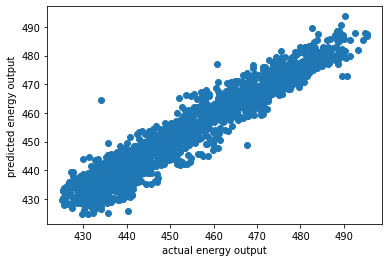

In [57]:
##Plotting actual vs predicted energy

plt.scatter(y_test[0],predicted_energy)

plt.xlabel('actual energy output')

plt.ylabel('predicted energy output')

Text(0, 0.5, 'predicted exhaust vacuum')

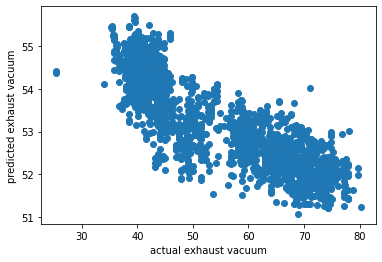

In [61]:
##Plotting actual vs predicted exhaust vacuum

plt.scatter(y_test[1],predicted_vaccum)

plt.xlabel('actual exhaust vacuum')

plt.ylabel('predicted exhaust vacuum')

In [64]:
from sklearn.metrics import r2_score
print('r2 score for energy predicted :',r2_score(y_test[0],predicted_energy))
print('r2 score forexhaust vacuum predicted :',r2_score(y_test[1],predicted_vaccum))

r2 score for energy predicted : 0.9211873713267374
r2 score forexhaust vacuum predicted : -0.15515474552251352
